**Objective:** 
The primary goal of this data science project is to understand the factors influencing medical insurance charges and build a predictive model that estimates the insurance cost for individuals based on their demographic, health, and lifestyle attributes. By identifying key drivers of medical costs, this analysis will assist insurance companies in optimizing their pricing strategies and customers in understanding their insurance charges.

## Dataset
1. `age` Age of the person
2. `sex` gender of the person (male/female)
3. `bmi` Body Mass Index of the person
4. `children` Number of children the person have
5. `smoker` whether the person is smoker or not
6. `region` in what region of the states the person is living
7. `charges`medical insurance of the person

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("insurance.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes.value_counts()

object     3
int64      2
float64    2
Name: count, dtype: int64

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Knowing your data

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.shape

(1338, 7)

In [15]:
# Range of people's age listed
min(df['age']),max(df['age'])

(18, 64)

In [17]:
#Range of people's bmi listed
min(df['bmi']),max(df['bmi'])

(15.96, 53.13)

In [19]:
#range of Charges
min(df['charges']),max(df['charges'])

(1121.8739, 63770.42801)

In [21]:
# range of children in the house
min(df['children']),max(df['children'])

(0, 5)

In [23]:
df.groupby('smoker')['region'].value_counts()

smoker  region   
no      southeast    273
        northwest    267
        southwest    267
        northeast    257
yes     southeast     91
        northeast     67
        northwest     58
        southwest     58
Name: count, dtype: int64

In [25]:
df.groupby('age')['bmi'].agg(min_bmi='min',max_bmi='max')


,min_bmi,max_bmi
age,,
18,15.960,53.130
19,17.480,44.880
20,21.800,40.470
21,16.815,39.490
22,19.950,52.580
23,17.385,50.380
24,20.520,40.150
25,20.800,45.540
26,17.195,46.530


In [27]:
result = pd.crosstab(index=[df['sex'], df['region']], columns=df['smoker'])
print(result)

# crosstab is a function used to compute a cross-tabulation of two or more factors

smoker             no  yes
sex    region             
female northeast  132   29
       northwest  135   29
       southeast  139   36
       southwest  141   21
male   northeast  125   38
       northwest  132   29
       southeast  134   55
       southwest  126   37


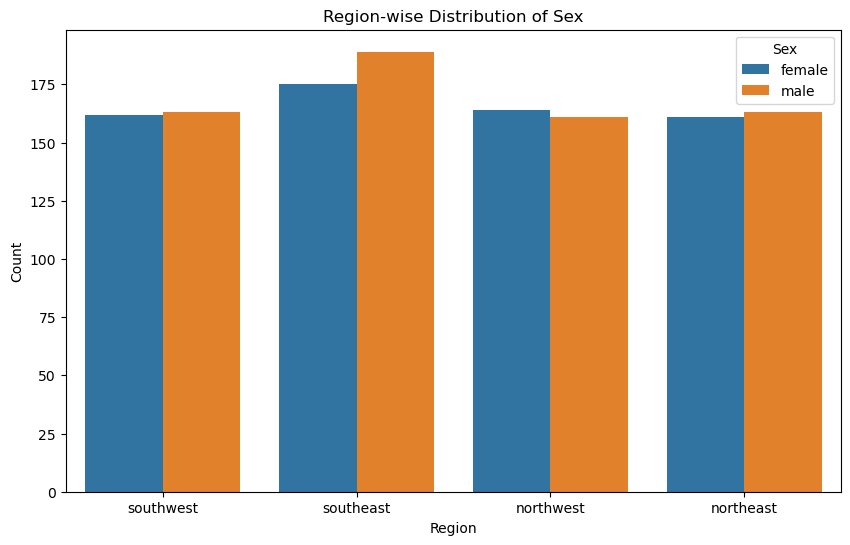

In [29]:
# No. of males, females in the list

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='sex') 
plt.title('Region-wise Distribution of Sex')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

**Observation:** Maximum population of Southeast region.

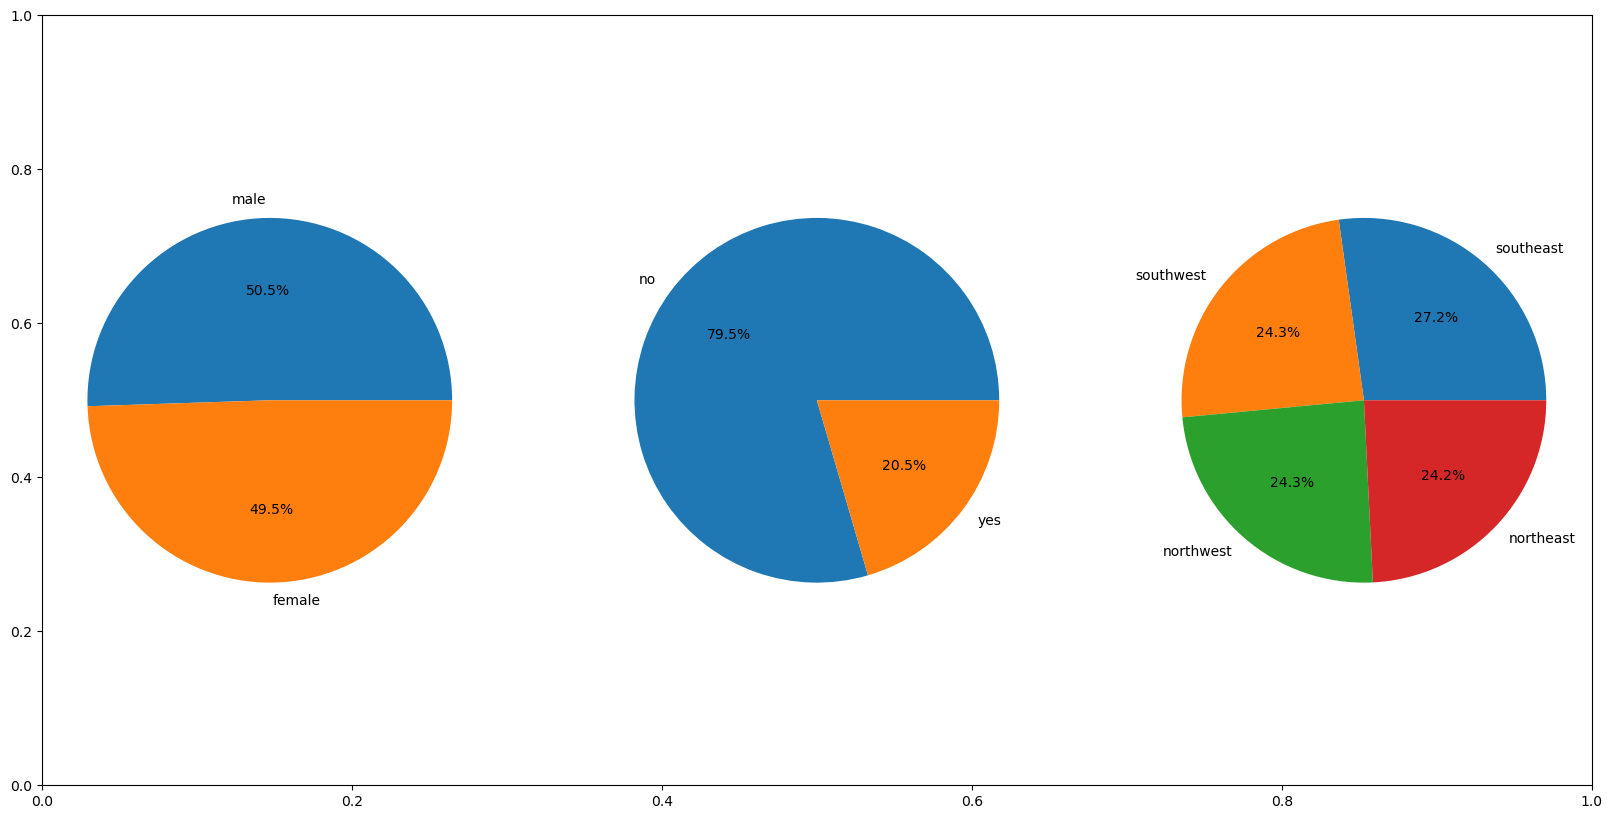

In [31]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()


**Observation:** 
1. Male population 50.5%, female population 49.5%
2. Smoker 20.5%, non smoker 79.5%
3. 24.3% from southwest, northwest 24.3%, northeast 24.2%, southeast 27.2%

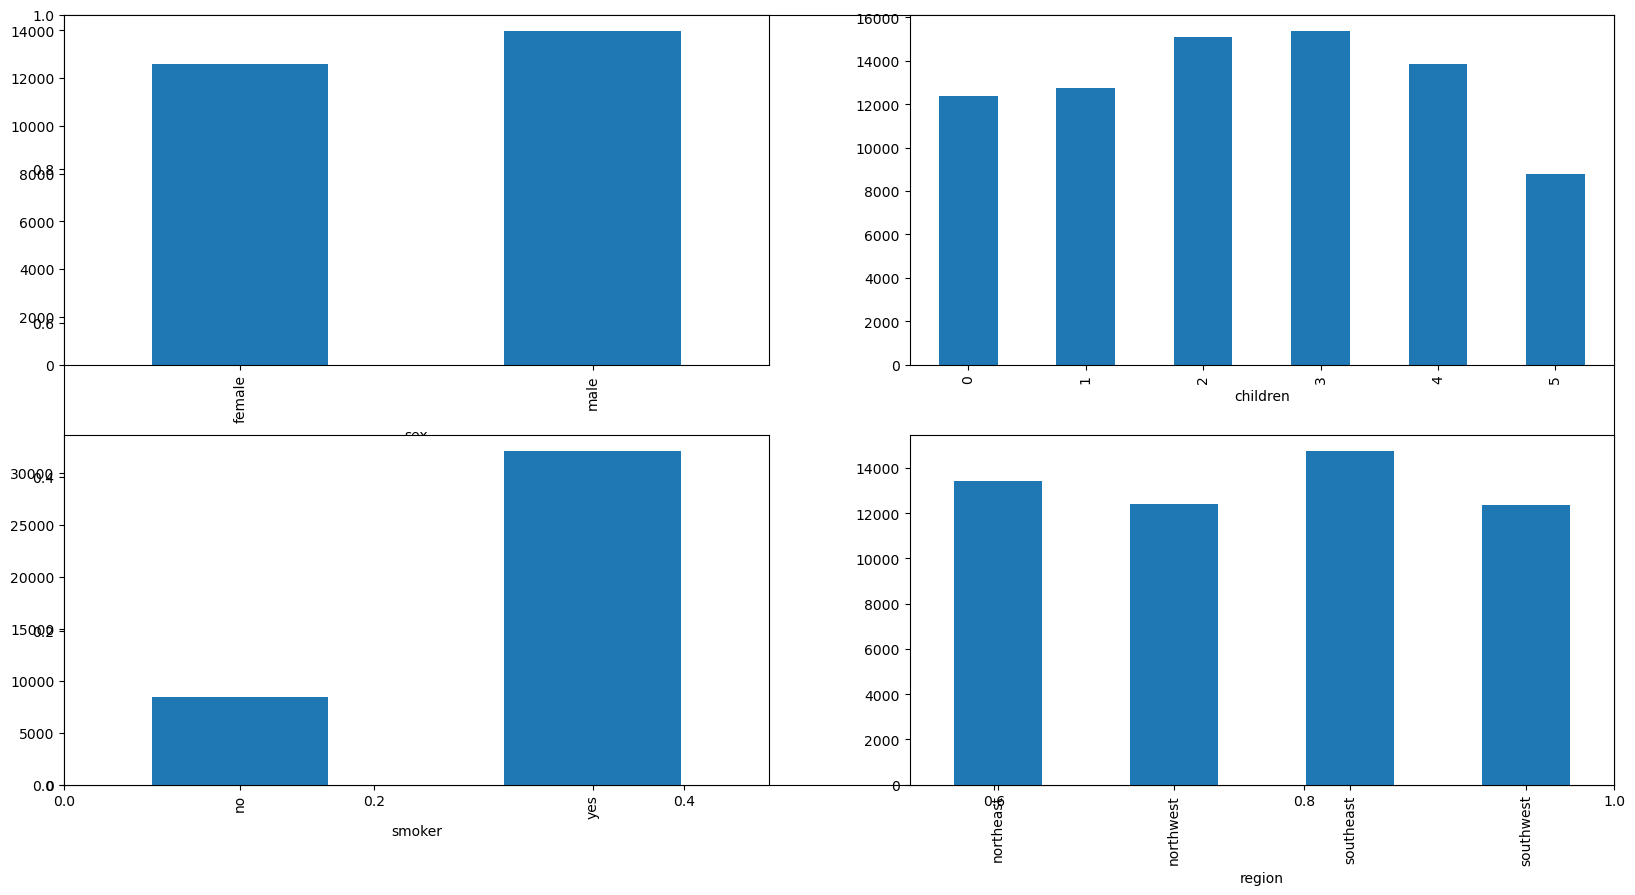

In [33]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()


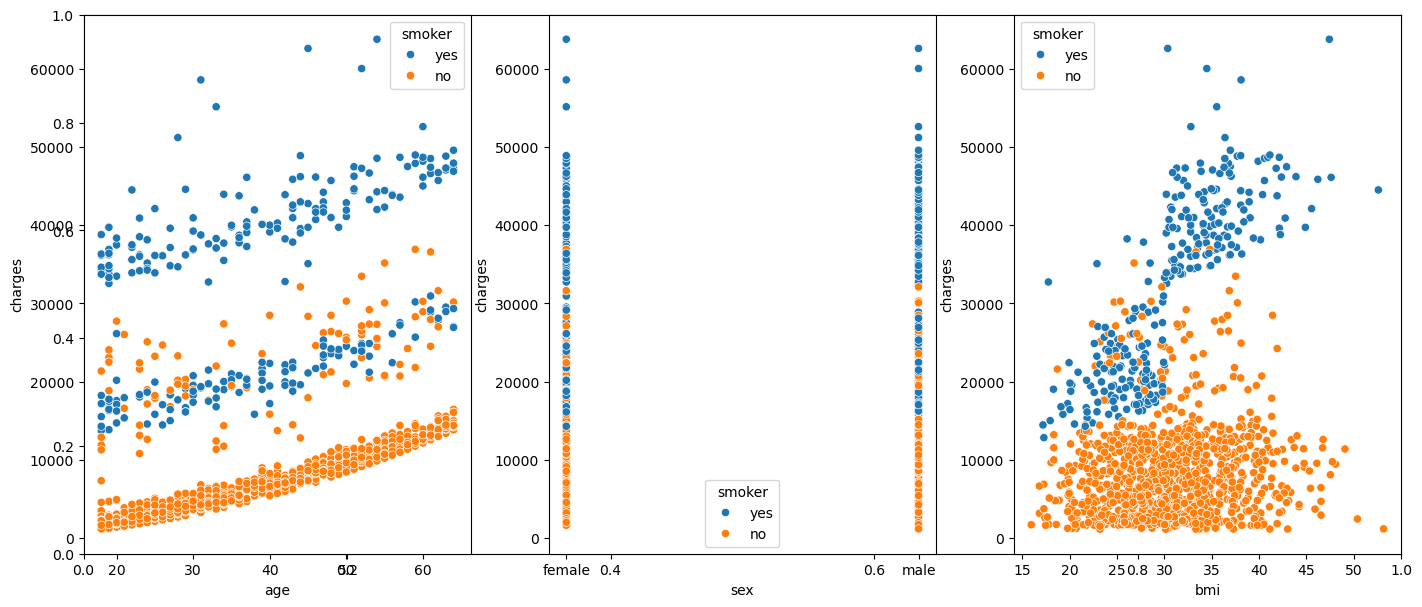

In [34]:
features = ['age','sex', 'bmi']
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

**Observation**
1. Smoker people have higher charges as compare to non smokers.
2. Few smokers and non smokers have very high bmi

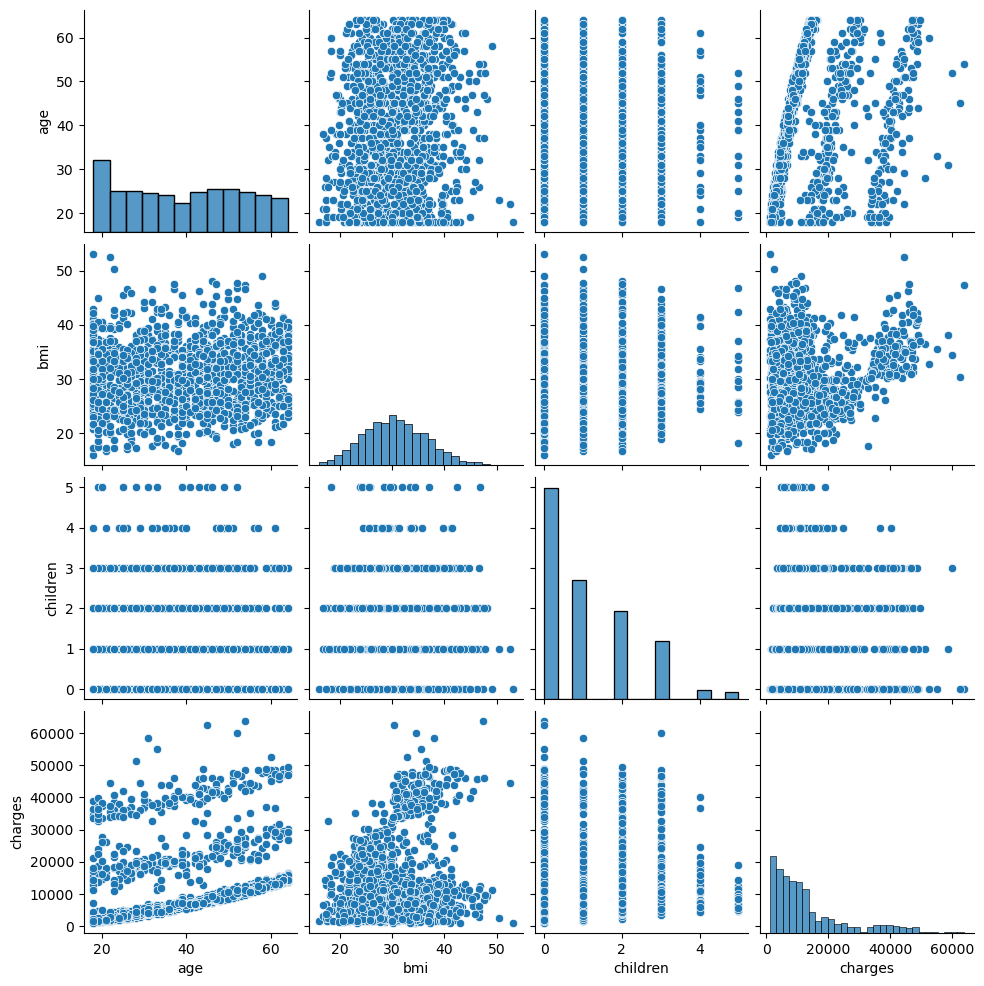

In [36]:
sns.pairplot(df)

## Data preprocessing

<Axes: ylabel='age'>

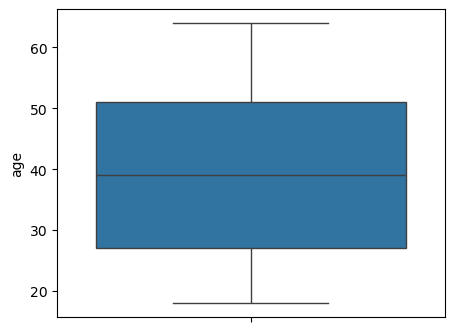

In [39]:
df.drop_duplicates(inplace=True)
plt.figure(figsize=(5,4))
sns.boxplot(df['age'])

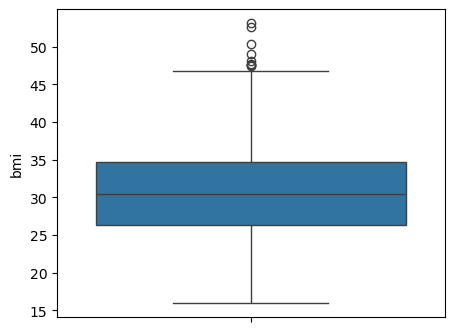

In [40]:
# outliers in bmi 

plt.figure(figsize=(5,4))
sns.boxplot(df['bmi'])
plt.show()

Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [46]:
# minimum, q1, median, q3, maximum

Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print("lowlimit: ",lowlim)
print("upperlim: ",upplim)

lowlimit:  13.674999999999994
upperlim:  47.31500000000001


<Axes: ylabel='bmi'>

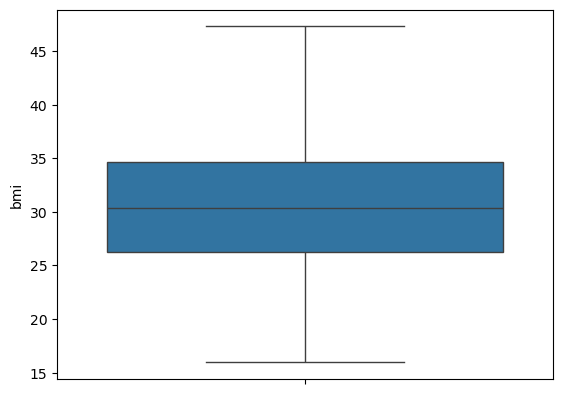

In [48]:
#outlier removal

from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [50]:
# checking skewness of the data

print(df['bmi'].skew())
print(df['age'].skew())


0.23289153320569975
0.054780773126998195


## Feature Encoding

In [54]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


## correlation of each numerical feature


<Axes: >

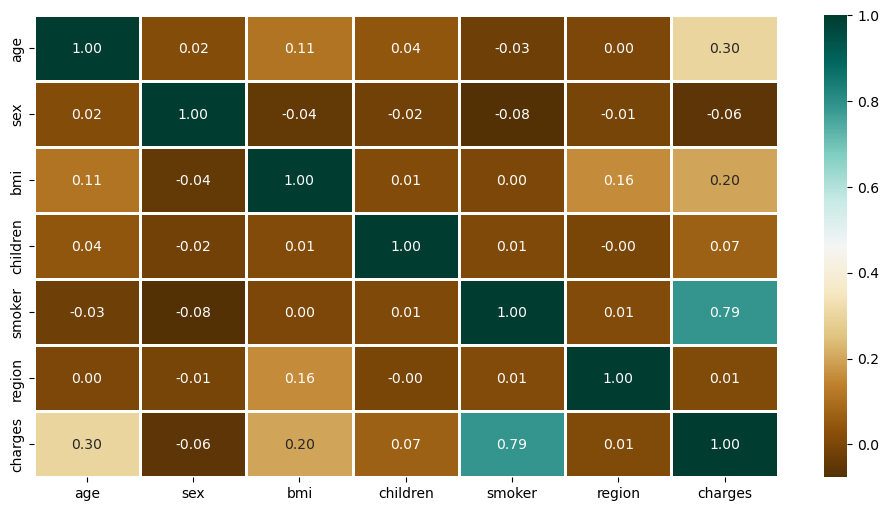

In [58]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

**observation:** smokers have a strong positive relation witht the insurance charges

In [62]:
# dropping target variable

x=df.drop(['charges'],axis=1)
y=df[['charges']]

In [64]:
# splitting train and test dataset

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [66]:
# fitting training, test and cross validation data 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd

l1 = []  # Training accuracy
l2 = []  # Test accuracy
l3 = []  # Cross-validation scores

lrmodel = LinearRegression()
lrmodel.fit(xtrain, ytrain)

# Append training and testing accuracies
l1.append(lrmodel.score(xtrain, ytrain))
l2.append(lrmodel.score(xtest, ytest))

# Perform cross-validation and store the mean score
cvs = cross_val_score(lrmodel, x, y, cv=5).mean()
l3.append(cvs)

df1 = pd.DataFrame({'train acc': l1, 'test acc': l2, 'cross_val_score': l3})
print(df1)


   train acc  test acc  cross_val_score
0   0.748497  0.752522          0.74707


## Comparing with other algorithms
After dividing dataset into training and cross validation, we want our model to run fast, so we try different algorithms to train our data.

In [69]:
# linear regression

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print("Training Score: ",lrmodel.score(xtrain,ytrain))
print("Test Score: ",lrmodel.score(xtest,ytest))
print("Cross Validation Score: ",cross_val_score(lrmodel,x,y,cv=5,).mean())

Training Score:  0.7295415541376445
Test Score:  0.8062391115570589
Cross Validation Score:  0.7470697972809902


In [71]:
# SVR

from sklearn.svm import SVR
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print("r2_score_train: ",r2_score(ytrain,ypredtrain1))
print("r2_score_test: ",r2_score(ytest,ypredtest1))
print("Cross Validation Score:",cross_val_score(svrmodel,x,y,cv=5,).mean())

r2_score_train:  -0.10151474302536445
r2_score_test:  -0.1344454720199666
Cross Validation Score: -0.10374591327267262


In [72]:
# Random forest regressor

from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("r2_score_train: ",r2_score(ytrain,ypredtrain2))
print("r2_score_test: ",r2_score(ytest,ypredtest2))
print("Cross Validation Score:",cross_val_score(rfmodel,x,y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,x,y,cv=5,).mean())


r2_score_train:  0.9738163260247533
r2_score_test:  0.8819423353068565
Cross Validation Score: 0.8363637309718952
{'n_estimators': 120}
0.9746383984429655
0.8822009842175969
0.8367438097052858


In [75]:
# Gradient Boosting regression

from sklearn.ensemble import GradientBoostingRegressor
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print("GradientBoosterRegressor")
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,x,y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,x,y,cv=5,).mean())


GradientBoosterRegressor
0.8931345821166041
0.904262629901686
0.8547389324799008
{'learning_rate': 0.2, 'n_estimators': 19}
0.8682397447116927
0.9017109716082662
0.8606041910125791


In [76]:
#XGBoost

from xgboost import XGBRegressor
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,x,y,cv=5,).mean())

from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,x,y,cv=5,).mean())


0.9954123497078247
0.8548937785039912
0.808125309217053
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8693173313051628
0.9022460881213404
0.8607115291219747


In [77]:
# summarising models training and test accuracy and CV score at one place


models = {
    "LinearRegression": LinearRegression(),
    "SupportVectorMachine": SVR(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

train_acc = []
test_acc = []
cv_scores = []

# Iterate over model
for name, model in models.items():
    model.fit(xtrain, ytrain)
    
    # Calculate training and test accuracy (R-squared score)
    train_accuracy = r2_score(ytrain, model.predict(xtrain))
    test_accuracy = r2_score(ytest, model.predict(xtest))
    
    # Calculate cross-validation score
    cv_score = cross_val_score(model, x, y, cv=5).mean()
    
    # Append results
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    cv_scores.append(cv_score)

# Create a dataframe to store the results
results_df = pd.DataFrame({
    "Algorithm": ["LinearRegression", "SupportVectorMachine", "RandomForest", "GradientBoost", "XGBoost"],
    "Training Accuracy": train_acc,
    "Test Accuracy": test_acc,
    "CV Score": cv_scores
})

print(results_df)


              Algorithm  Training Accuracy  Test Accuracy  CV Score
0      LinearRegression           0.729542       0.806239  0.747070
1  SupportVectorMachine          -0.101515      -0.134445 -0.103746
2          RandomForest           0.975331       0.881799  0.837801
3         GradientBoost           0.893135       0.904274  0.855247
4               XGBoost           0.995412       0.854894  0.808125


**Observation:**
1. Best training accuracy. test accurary and cross validation score by XGBoost algorithm

In [83]:
#deciding important features

feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=x.columns,columns=['Importance'])
print(feats)


          Importance
age         0.038633
sex         0.000000
bmi         0.133449
children    0.011073
smoker      0.809626
region      0.007219


In [85]:
# having importance > 0.01
important_features=feats[feats['Importance']>0.01]
print(important_features)


          Importance
age         0.038633
bmi         0.133449
children    0.011073
smoker      0.809626


### Preparing final model by using XGBoost after dropping non importance model

In [87]:

df.drop(df[['sex','region']],axis=1,inplace=True)
xf=df.drop(df[['charges']],axis=1)
x=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(xf,y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print("Training accuracy: ",r2_score(ytrain,ypredtrain4))
print("Test Accuracy: ",r2_score(ytest,ypredtest4))
print("CV Score: ",cross_val_score(finalmodel,x,y,cv=5,).mean())


 Training accuracy:  0.869105118970057
Test Accuracy:  0.9007425513499979
CV Score:  0.8606266871712276


### prediction on new data

In [89]:

new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)


array([18035.828], dtype=float32)